In [27]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
X, y = make_classification(
    n_features=7,
    n_classes=3,
    n_samples=2500,
    n_informative=3,
    random_state=45,
    n_clusters_per_class=1,
)

In [13]:
n_samples= X.shape[0]
n_features = X.shape[1]
n_classes = pd.DataFrame(y).nunique()

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 2500
n_features: 7
n_classes: 3


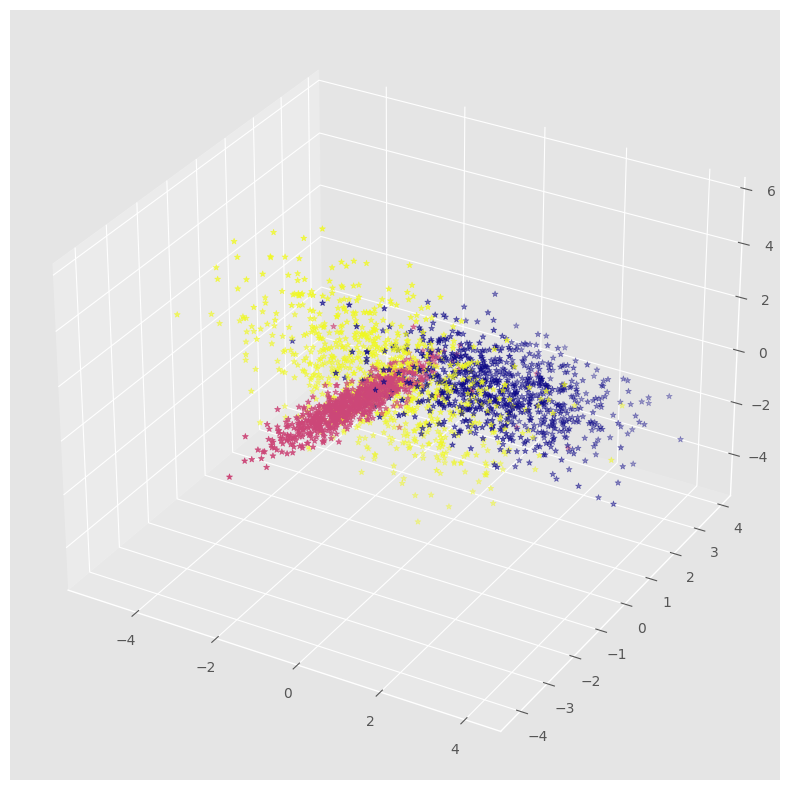

In [14]:
fig = plt.figure(figsize=(10, 10))
plt.style.use('ggplot')
ax = fig.add_subplot(projection='3d')

sequence_containing_x_vals = X[:, 0]
sequence_containing_y_vals = X[:, 1]
sequence_containing_z_vals = X[:, 2]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, c=y, marker ="*", cmap='plasma')
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=45)

In [16]:
# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predictions on test data
y_pred = model.predict(X_test)

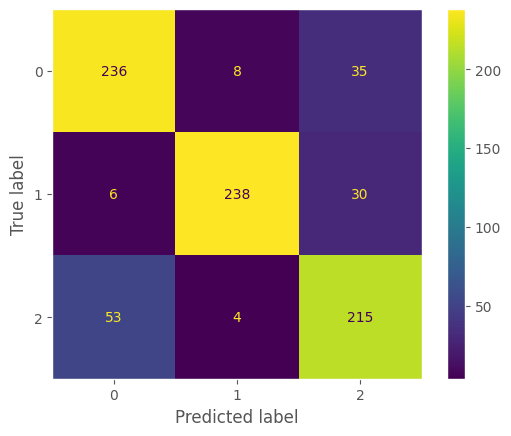

In [17]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.grid(False)
plt.show()

In [56]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 825 points : 136


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       279
           1       0.95      0.87      0.91       274
           2       0.77      0.79      0.78       272

    accuracy                           0.84       825
   macro avg       0.84      0.83      0.84       825
weighted avg       0.84      0.84      0.84       825



In [31]:
df = pd.DataFrame(X)
df['Class']= y
df.head()

,0,1,2,3,4,5,6,Class
0,0.472792,1.059830,-0.824521,1.710832,-0.986518,1.244699,-0.440154,0
1,2.190927,2.674018,-1.288893,2.377308,-1.958749,0.521034,0.103992,0
2,-0.613135,0.063891,0.221446,0.867922,-0.813506,-1.585623,0.258588,2
3,-0.882300,-1.018732,0.397570,-0.778757,0.750441,-0.514865,-0.327117,1
4,-1.421404,-1.515577,0.717490,-1.078343,0.946185,0.109869,0.218771,1


In [102]:
freq_table = df['Class'].value_counts().sort_index()
print("Frequency table: ")
print(freq_table[0:3])

Frequency table: 
0    832
1    838
2    830
Name: Class, dtype: int64


In [50]:
print("Likelihood: ")
print(f'Class 0: {freq_table[0]/len(df)*100}%')
print(f'Class 1: {freq_table[1]/len(df)*100}%')
print(f'Class 2: {freq_table[2]/len(df)*100}%')

Likelihood: 
Class 0: 33.28%
Class 1: 33.52%
Class 2: 33.2%


In [ ]:
predictions = model.predict_proba(X_test)
pred_To_Class_map = pd.DataFrame(predictions*100, columns=['Class 0','Class 1', 'Class 2'])

In [99]:
row = 0

while row != 999:
    row = int(input("Enter the record number 0-824 you would like to see model prediction probabilities of or type 999 to quit: "))
    if row != 999:
        print()
        print(f"Posterior probabilities for point {row}: ")
        print (pred_To_Class_map.iloc[row])
        print()
    else:
        print()
        break

print("Thank you this concludes the demo.")


Enter the record number 0-824 you would like to see model prediction probabilities of or type 999 to quit: 452

Posterior probabilities for point 452: 
Class 0    99.696725
Class 1     0.000007
Class 2     0.303268
Name: 452, dtype: float64

Enter the record number 0-824 you would like to see model prediction probabilities of or type 999 to quit: 421

Posterior probabilities for point 421: 
Class 0     0.050166
Class 1     0.000015
Class 2    99.949819
Name: 421, dtype: float64

Enter the record number 0-824 you would like to see model prediction probabilities of or type 999 to quit: 555

Posterior probabilities for point 555: 
Class 0    18.639573
Class 1     8.647052
Class 2    72.713375
Name: 555, dtype: float64

Enter the record number 0-824 you would like to see model prediction probabilities of or type 999 to quit: 999

Thank you this concludes the demo.
